In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from spring import spring

In [2]:
x_1 = sp.Function('x_1')
x_2 = sp.Function('x_2')

t = sp.symbols('t')
g = sp.symbols('g')
k_1 = 7
k_2 = 14

eq_1 = sp.Eq(x_1(t).diff(t, t), g - k_1*x_1(t))
eq_2 = sp.Eq(x_2(t).diff(t, t), g - k_2*(x_2(t) - x_1(t)))
eqs = [eq_1, eq_2]

In [3]:
sol = sp.dsolve(eqs, ics={
  x_1(0): 1,
  x_2(0): 2,
  sp.diff(x_1(t), t).subs(t, 0): 0,
  sp.diff(x_2(t), t).subs(t, 0): 0
})

In [4]:
sol[0]

Eq(x_1(t), g*cos(sqrt(7)*t)**2/7 + 2*g*sin(sqrt(7)*t)*tan(sqrt(7)*t/2)/(7*(tan(sqrt(7)*t/2)**2 + 1)) - (g - 7)*cos(sqrt(7)*t)/7)

In [5]:
sol[1]

Eq(x_2(t), sqrt(14)*C3*sin(sqrt(14)*t)/14 - g*cos(sqrt(14)*t)**2/14 + g*cos(sqrt(14)*t)/14 + 2*g*cos(sqrt(7)*t)**2/7 + 4*g*sin(sqrt(7)*t)*tan(sqrt(7)*t/2)/(7*(tan(sqrt(7)*t/2)**2 + 1)) - g*sin(sqrt(14)*t)*tan(sqrt(14)*t/2)/(7*(tan(sqrt(14)*t/2)**2 + 1)) - 2*(g - 7)*cos(sqrt(7)*t)/7)

In [6]:
x_1_func = sp.lambdify(t, sol[0].rhs.subs(g, 10))
x_2_func = sp.lambdify(t, sol[1].rhs.subs(g, 10))

In [7]:
ANIM_TIME = 30 # seconds
FPS = 50
FRAMETIME = 1 / FPS # in seconds
TOTAL_FRAMES = ANIM_TIME * FPS

In [8]:
ts = np.linspace(0, ANIM_TIME, FPS * ANIM_TIME)

x_1_anim = -x_1_func(ts)
x_2_anim = -x_2_func(ts)

In [9]:
ylim = (int(np.concatenate([x_1_anim, x_2_anim]).min()) - 1, int(np.concatenate([x_1_anim, x_2_anim]).max()) + 1)

In [10]:
origin = (0, 0)
def animate(frame):
    x_1 = x_1_anim[frame]
    x_2 = x_2_anim[frame]

    line_1.set_data(*spring(origin, (0, x_1), 20, 0.5))
    line_2.set_data(*spring((0, x_1), (0, x_2), 20, 0.5))

    return line_1, line_2

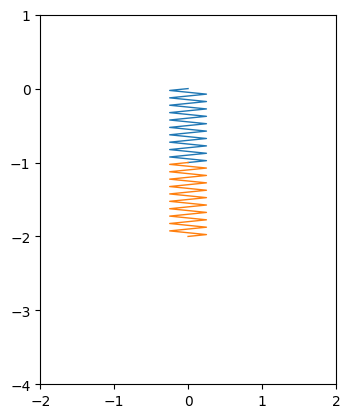

In [11]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=ylim)
ax.set_aspect("equal", "box")
line_1 = ax.plot([], [], lw=1)[0]
line_2 = ax.plot([], [], lw=1)[0]

anim = FuncAnimation(fig, animate,
                     frames=TOTAL_FRAMES, interval=int(FRAMETIME*1000), blit=True)

In [12]:
anim.save("heavy_spring.mp4") # warning, may take some time

In [13]:
# anim.save("heavy_spring.gif")